<a href="https://colab.research.google.com/github/susant146/Basics_ImageProcessing-CV/blob/main/ComputerVison_and_OpenCV_Lib.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

\# Autonomous System [VITyarthi Online Course]
**Module - 05** **[Part-02]**

**Application of Computer Vision in Autonomous System** [Visual Perception and Autonomous]

**Designed By**: Dr. Susant Kumar Panigrahi

Assistant Professor, SEEE, VIT Bhopal

# **Step1: Load the Dependencies**

1.   [Numpy](https://numpy.org/) is an array manipulation library, used for linear algebra, Fourier transform, and random number capabilities.
2.   [Pandas](https://https://pandas.pydata.org/) is a library for data manipulation and data analysis.
3.  [CV2](https://https://opencv.org/) is a library for computer vision tasks.
4. [Matplotlib](https://https://matplotlib.org/) is a library which generates figures and provides graphical user interface toolkit.

In [ ]:
import numpy as np
import pandas as pd
import cv2 as cv2
from google.colab.patches import cv2_imshow # for image display
import matplotlib.pylab as plt

# **Template Matching**

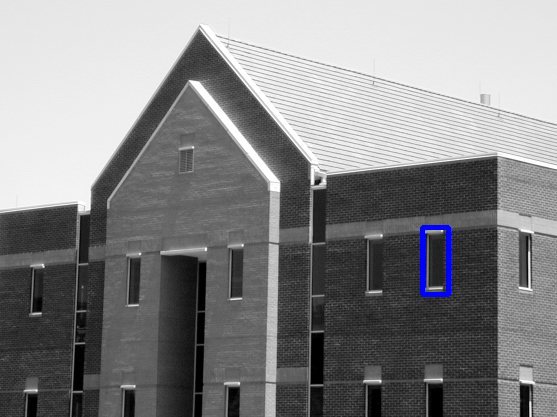

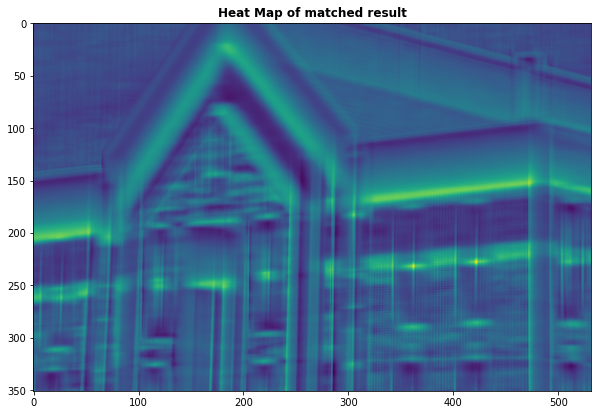

In [ ]:
image = cv2.imread('/content/Building.tif')
template = cv2.imread('/content/Template.tif')

# # resize images
image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
template = cv2.resize(template, (0,0), fx=0.5, fy=0.5)

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Find template
# All the 6 methods for comparison in a list
# Note: The last two methods 'cv2.TM_SQDIFF' and 'cv2.TM_SQDIFF_NORMED provides
# best match on minimum value. However other methods provides best match at
# maximum value.
# methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
#             'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']
result = cv2.matchTemplate(imageGray,templateGray, cv2.TM_CCOEFF_NORMED)
fig = plt.figure(figsize = (10, 10))
plt.imshow(result)
plt.title('Heat Map of matched result', fontweight = 'bold')
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h,w = templateGray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)
cv2.rectangle(image,top_left, bottom_right,(255,0,0),4)

cv2_imshow(image)

#**Depth Estimation: Stereo Vision (Disparity Map)**

([], <a list of 0 Text major ticklabel objects>)

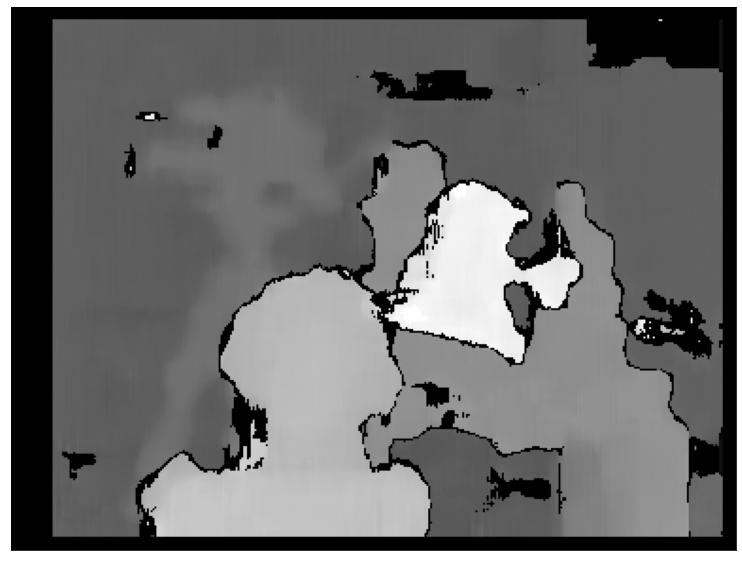

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

imgL = cv2.imread('/content/tsukuba_l.png',0)
imgR = cv2.imread('/content/tsukuba_r.png',0)

stereo = cv2.StereoBM_create(numDisparities=16, blockSize=15)
#stereo = cv2.StereoBM(1, 16, 15)
disparity = stereo.compute(imgL,imgR)
plt.figure(figsize = (20,10))
plt.imshow(disparity,'gray')
plt.xticks([])
plt.yticks([])

# **Edge Detectors**

**Laplacian of Gaussian (LoG)**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4,4,40);
X,Y = np.meshgrid(x, x)
sig = 1.4

K = -(1/(np.pi*sig)**4)
K1 = 1-(np.power(X,2)+np.power(Y,2))/(2*np.power(sig,2))
K2 = np.exp(-(np.power(X,2)+np.power(Y,2))/(2*np.power(sig,2)))
LoG = K*np.multiply(K1,K2)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(X, Y, LoG)

**Derivative of Gaussian (DoG)**

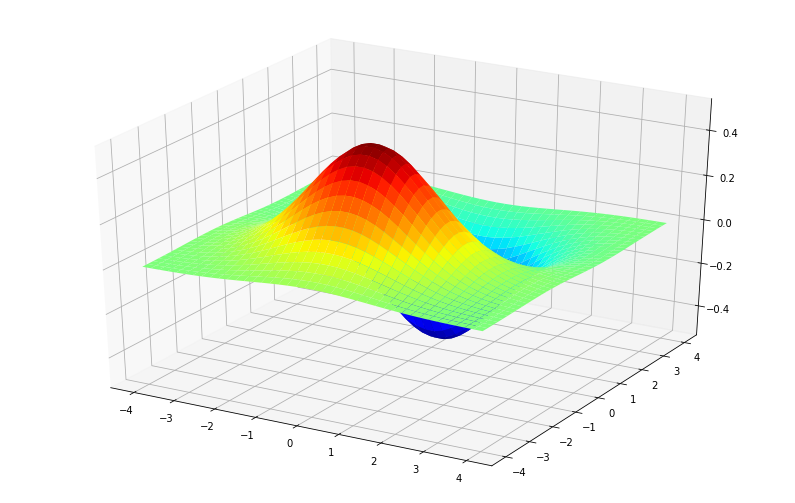

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-4,4,40);
X,Y = np.meshgrid(x, x)
sig = 1.4

K = -(1/(2*np.pi)*sig**4)
K1 = np.exp(-(np.power(X,2)+np.power(Y,2))/(2*np.power(sig,2)))
DoG_Y = K*np.multiply(Y, K1)

fig = plt.figure(figsize =(14, 9))
ax = plt.axes(projection ='3d')

# Creating plot
ax.plot_surface(X, Y, DoG_Y, cmap = 'jet')

**1.1  Sobel Operator for Edge Detection**

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


Text(0.5, 1.0, 'Sobel Edge on Noisy Image')

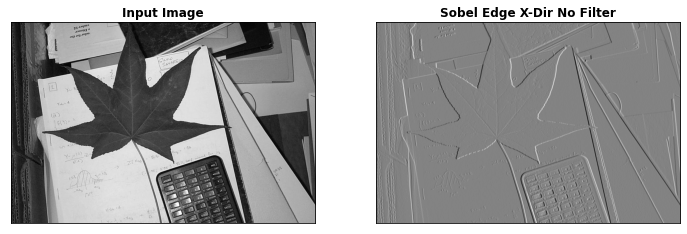

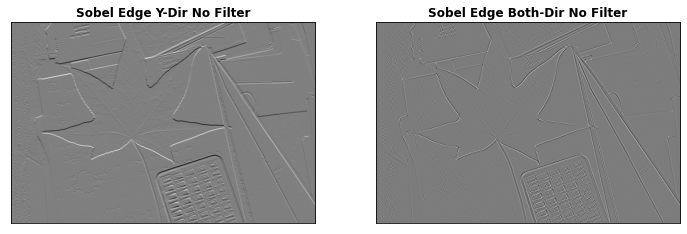

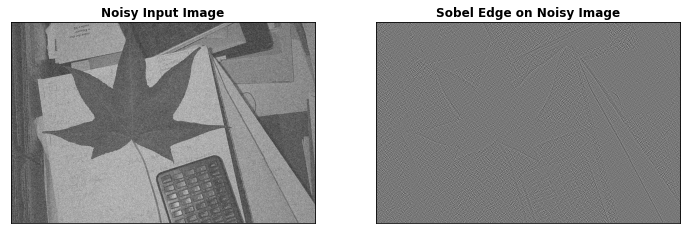

In [ ]:
img = cv2.imread('/content/image_0040.jpg')
# Convert the image to grayscale image.
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Input Image', fontweight = 'bold')
# Sobel Edge Detection on the X axis
img_SobEdgeX = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)
fig.add_subplot(1,2,2)
plt.imshow(img_SobEdgeX, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Sobel Edge X-Dir No Filter', fontweight = 'bold')

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
# Sobel Edge Detection on the Y axis
img_SobEdgeY = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)
fig.add_subplot(1,2,1)
plt.imshow(img_SobEdgeY, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Sobel Edge Y-Dir No Filter', fontweight = 'bold')
# Sobel Edge Detection in the both direction
img_SobEdge = cv2.Sobel(src=img_gray, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)
fig.add_subplot(1,2,2)
plt.imshow(img_SobEdge, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Sobel Edge Both-Dir No Filter', fontweight = 'bold')

# Add noise to the input image to test its effect on Sobel edge detector.
img_gray.astype(np.float)
mean = 0
sigma = 40
gauss = np.random.normal(mean,sigma,np.shape(img_gray))
#gauss = gauss.reshape(row,col,ch)
noisy_img = img_gray + gauss
fig1 = plt.figure(figsize = (12,12))
fig1.add_subplot(1,2,1)
plt.imshow(noisy_img, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Noisy Input Image', fontweight = 'bold')

# Sobel Edge Detection in the both direction: Noisy Image
imgNoisy_SobEdge = cv2.Sobel(src=np.uint8(noisy_img), ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5)

fig1.add_subplot(1,2,2)
plt.imshow(imgNoisy_SobEdge, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Sobel Edge on Noisy Image', fontweight = 'bold')

**1.2 Canny Edge Detector**

Text(0.5, 1.0, 'Canny Edge Detector: Filtered')

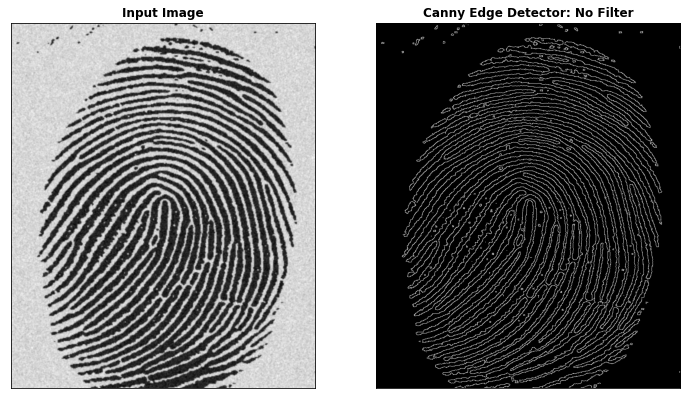

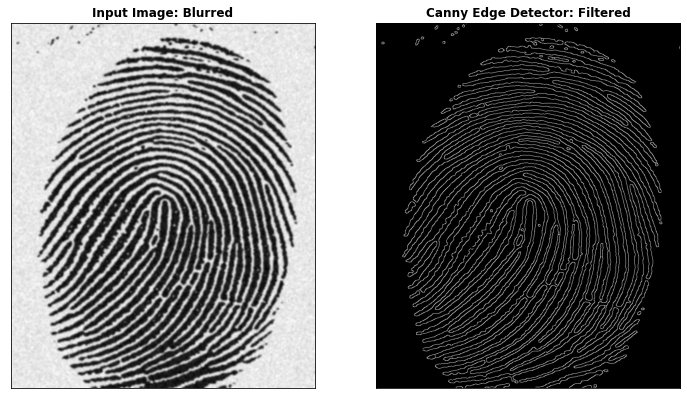

In [ ]:
img_gray = cv2.imread('/content/Fig1038(a)(noisy_fingerprint).tif', 0)
# -------- CANNY EDGE on RAW IMAGE ---------------
EdgeCanny_Img = cv2.Canny(img_gray, 100, 200)
fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
plt.imshow(img_gray, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Input Image', fontweight = 'bold')

fig.add_subplot(1,2,2)
plt.imshow(EdgeCanny_Img , cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Canny Edge Detector: No Filter', fontweight = 'bold')

# ---- CANNY EDGE DETECTOR on FILTRED IMAGE ---------------
img_grayBlur = cv2.GaussianBlur(img_gray, (9, 9), 0)
# compute a "wide", "mid-range", and "tight" threshold for the edges
# using the Canny edge detector
# edges = cv2.Canny(image=blurred, threshold1=100, threshold2=200)
EdgeCanny_ImgBlur = cv2.Canny(img_grayBlur, 100, 200)
# mid = cv2.Canny(blurred, 30, 150)
# tight = cv2.Canny(blurred, 240, 250)

fig = plt.figure(figsize=(12,12))
fig.add_subplot(1,2,1)
plt.imshow(img_grayBlur, cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Input Image: Blurred', fontweight = 'bold')

fig.add_subplot(1,2,2)
plt.imshow(EdgeCanny_ImgBlur , cmap = 'gray')
plt.xticks([]), plt.yticks([])
plt.title('Canny Edge Detector: Filtered', fontweight = 'bold')

# ***Corner Detection***

**1.1    Harris Corner Detection**

Text(0.5, 1.0, 'Detected Corners using Harris Operator')

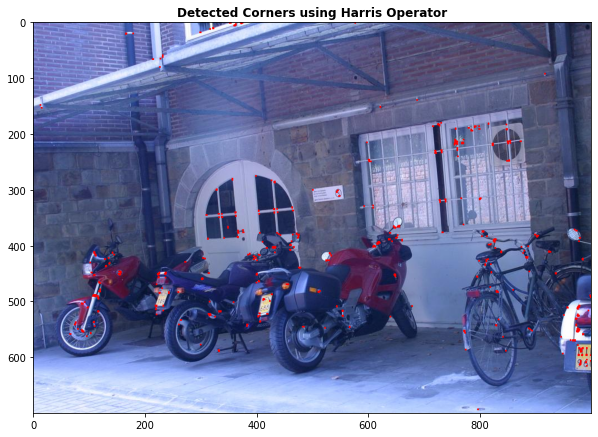

In [ ]:
img = cv2.imread('/content/img1.bmp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
# Represent image in float32 format.
gray = np.float32(gray)
# Parameters of Harris Detector
# img - Input image. It should be grayscale and float32 type.
# blockSize - It is the size of neighbourhood considered for corner detection
# ksize - Aperture parameter of the Sobel derivative used.
# k - Harris detector free parameter in the equation.
dst = cv2.cornerHarris(src=gray,blockSize=2,ksize=3,k=0.04)

#result is dilated for marking the corners, not important
dst = cv2.dilate(dst,None)

# Threshold for an optimal value, it may vary depending on the image.
img[dst>0.05*dst.max()]=[0,0,255]
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (10,10))
plt.imshow(img)
plt.title('Detected Corners using Harris Operator', fontweight = 'bold')

**1.2    Shi-Tomasi Corner Detection**

Text(0.5, 1.0, 'Detected Corners using Harris Operator')

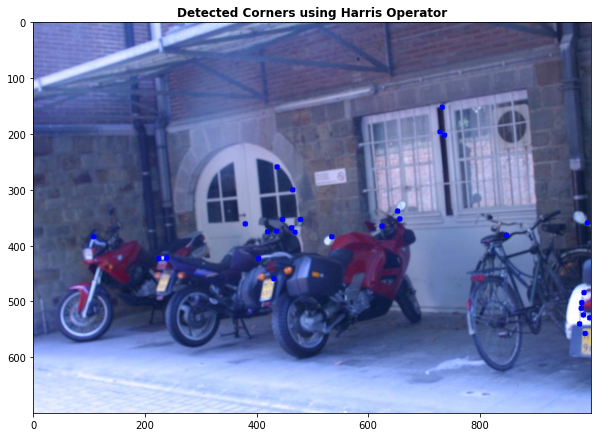

In [ ]:
img = cv2.imread('/content/img3.bmp')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Find the top 30 corners
corners = cv2.goodFeaturesToTrack(gray,30,0.01,10)
corners = np.int0(corners)

# Manually draw circles on the detected corner points in the image.
for i in corners:
    x,y = i.ravel()
    cv2.circle(img,(x,y),5,(255,0,0),-1)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
fig = plt.figure(figsize = (10,10))
plt.imshow(img)
plt.title('Detected Corners using Harris Operator', fontweight = 'bold')

# **SIFT Feature Descriptor**

In [ ]:
# Check Version ---- Must be version 4.4.0
cv2.__version__
# Otherwise install OpenCV Version = 4.4.0----
!pip install opencv-contrib-python==4.4.0.44
import cv2 as cv2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


(([], <a list of 0 Text major ticklabel objects>),
 ([], <a list of 0 Text major ticklabel objects>))

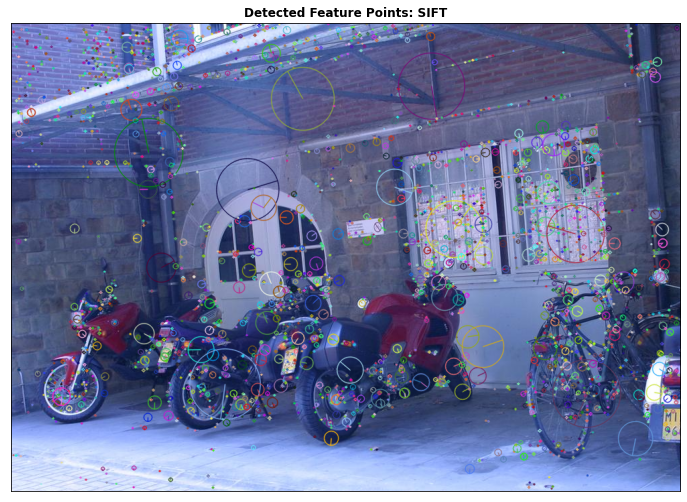

In [ ]:
rgb_img = cv2.cvtColor(cv2.imread("/content/img1.bmp"), cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)
# Apply SIFT detector for Key-Point Extraction ---
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_img, None)

SIFT_DetImg = cv2.drawKeypoints(rgb_img, kp_l, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

plt.figure(figsize=(12, 12))
plt.imshow(SIFT_DetImg)
plt.title("Detected Feature Points: SIFT", fontweight = 'bold')
plt.xticks([]), plt.yticks([])

# **Feature Matching using SIFT Descriptor**

Text(0.5, 1.0, 'keypoints matches')

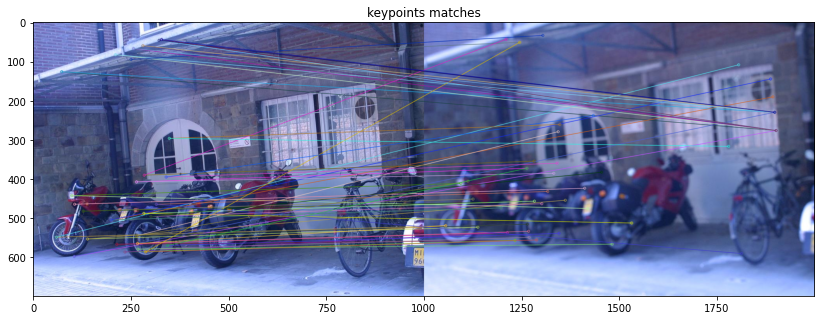

In [ ]:
# Read Image 01
rgb_l = cv2.cvtColor(cv2.imread("/content/img1.bmp"), cv2.COLOR_BGR2RGB)
gray_l = cv2.cvtColor(rgb_l, cv2.COLOR_RGB2GRAY)
# Read Image 02
rgb_2 = cv2.cvtColor(cv2.imread("/content/img6.bmp"), cv2.COLOR_BGR2RGB)
gray_2 = cv2.cvtColor(rgb_2, cv2.COLOR_RGB2GRAY)

# SIFT Detector and Descriptor
feature_extractor = cv2.SIFT_create()

# find the keypoints and descriptors with chosen feature_extractor
kp_l, desc_l = feature_extractor.detectAndCompute(gray_l, None)
kp_2, desc_2 = feature_extractor.detectAndCompute(gray_2, None)

# Feature Matching
bf = cv2.BFMatcher()
matches = bf.knnMatch(desc_l, desc_2, k=2)

# Apply ratio test
good_and_second_good_match_list = []
for m in matches:
    if m[0].distance/m[1].distance < 0.5:
        good_and_second_good_match_list.append(m)
good_match_arr = np.asarray(good_and_second_good_match_list)[:,0]

# show only 30 matches
im_matches = cv2.drawMatchesKnn(rgb_l, kp_l, rgb_2, kp_2,
                                good_and_second_good_match_list[0:30], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)

plt.figure(figsize=(14, 14))
plt.imshow(im_matches)
plt.title("keypoints matches")

# **Face Detection (Viola Jones)**

In [ ]:
import requests
# Download the pre-trained Haar Cascade frontalface data
url = 'https://raw.github.com/opencv/opencv/master/data/haarcascades/haarcascade_frontalface_default.xml'
r = requests.get(url, allow_redirects=True)
open('haarcascade_frontalface_default.xml', 'wb').write(r.content)


930127

In [ ]:
Solvey = cv2.imread('/content/Solvay.jpg', 0)

# Create the face detection classifier
# Pre-trained cascade files [Around 600 classifiers]
Haar_CascadeFF = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')

In [ ]:
def detect_face(img):
  face_img = img
  # Defacult scaleFactor and MinNeighbor parameters
  # For multiple faces these parameters require adjustment
  face_rect = Haar_CascadeFF.detectMultiScale(face_img, scaleFactor = 1.2, minNeighbors = 5)

  for (x, y, w, h) in face_rect:
    cv2.rectangle(face_img, (x,y), (x+w, y+h), 255, 10)

  return face_img

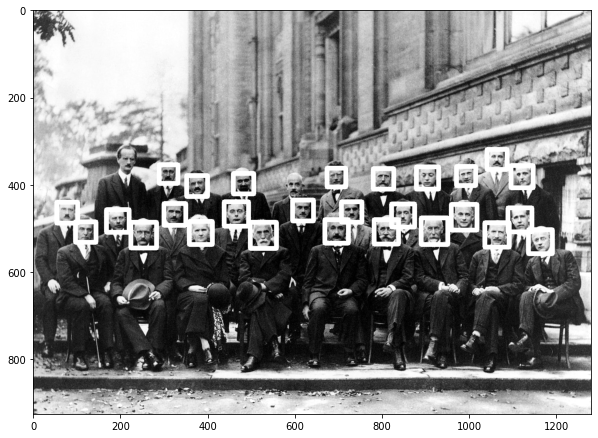

In [ ]:
face = detect_face(Solvey)
fig = plt.figure(figsize = (10,10))
plt.imshow(face, cmap = 'gray')

# **Color Based Object Detection**

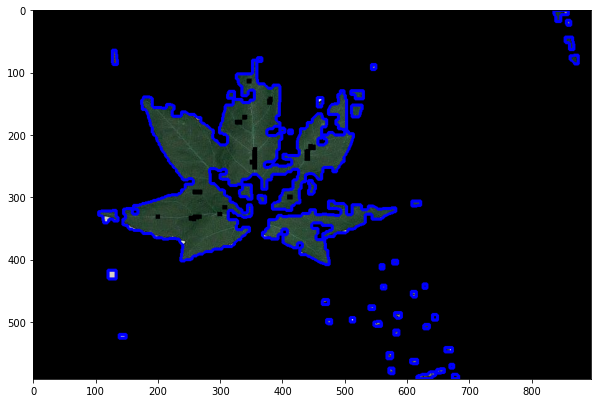

In [ ]:
# Reading an color image.
img = cv2.imread('/content/image_0040.jpg')

# convert to hsv colorspace
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
# lower bound and upper bound for Green color
lower_bound = np.array([50, 20, 20])
upper_bound = np.array([100, 255, 255])
# find the colors within the boundaries
mask = cv2.inRange(hsv, lower_bound, upper_bound)

#define kernel size
kernel = np.ones((7,7),np.uint8)
# Remove unnecessary noise from mask
mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)

# Segment only the detected region
segmented_img = cv2.bitwise_and(img, img, mask=mask)

contours, hierarchy = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
output = cv2.drawContours(segmented_img, contours, -1, (0, 0, 255), 3)

fig = plt.figure(figsize = (10, 10))
plt.imshow(output)